---
## Step 1: Importing Data

In [186]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [187]:
# Importing all the libraries used in the case study
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, roc_curve, auc

In [188]:
# importing data and reading it
pd.options.display.max_columns=None
bank = pd.read_csv('/kaggle/input/bank-csv/bank.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


---
## Step 2: Inspecting Data

In [189]:
# counting null values of every column
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [190]:
# checking datatypes and null values in each columns
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [191]:
# shape of data
bank.shape

(4521, 17)

In [192]:
# statistical aspects of the dataframe
bank.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


---
## Step 3: Manipulating data

Changing all the **yes** and **no** columns to 1 and 0.

In [193]:
# list of variables which needs to be changed
col = ['default','housing','loan','y']

# function definition
def convert(x):
    return x.map({'yes':1,'no':0})

# calling the function
bank[col] = bank[col].apply(convert)

In [194]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


---
### Count of the every categorical variable present in the data

In [195]:
# count of column job
bank['job'].astype("category").value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [196]:
# count of column marital
bank['marital'].astype("category").value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

In [197]:
# count of column education
bank['education'].astype("category").value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [198]:
# count of column contact
bank['contact'].astype("category").value_counts()

contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

In [199]:
# count of column month
bank['month'].astype("category").value_counts()

month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64

In [200]:
# count of column poutcome
bank['poutcome'].astype("category").value_counts()

poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64

---
### Making dataframe of all the categorical columns to make dummy variables for all these categorical variables.

In [201]:
categorical = bank.select_dtypes(include=['object'])
categorical.head()

,job,marital,education,contact,month,poutcome
0,unemployed,married,primary,cellular,oct,unknown
1,services,married,secondary,cellular,may,failure
2,management,single,tertiary,cellular,apr,failure
3,management,married,tertiary,unknown,jun,unknown
4,blue-collar,married,secondary,unknown,may,unknown


In [202]:
# dummy variables of all categorical columns
dummies = pd.get_dummies(categorical,drop_first=True)
dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [203]:
# concatination of two dataframes 'bank' and 'dummies'
bank = pd.concat([bank,dummies],axis=1)
bank.drop(columns=categorical.columns,axis=1,inplace=True)

In [204]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,33,0,4789,1,1,11,220,1,339,4,0,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,35,0,1350,1,0,16,185,1,330,1,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,30,0,1476,1,1,3,199,4,-1,0,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4,59,0,0,1,0,5,226,1,-1,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [205]:
bank.shape

(4521, 43)

In [206]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   default              4521 non-null   int64
 2   balance              4521 non-null   int64
 3   housing              4521 non-null   int64
 4   loan                 4521 non-null   int64
 5   day                  4521 non-null   int64
 6   duration             4521 non-null   int64
 7   campaign             4521 non-null   int64
 8   pdays                4521 non-null   int64
 9   previous             4521 non-null   int64
 10  y                    4521 non-null   int64
 11  job_blue-collar      4521 non-null   bool 
 12  job_entrepreneur     4521 non-null   bool 
 13  job_housemaid        4521 non-null   bool 
 14  job_management       4521 non-null   bool 
 15  job_retired          4521 non-null   bool 
 16  job_self-employed    452

#####  Now we have 43 columns in the dataframe on which we need to perform the analysis and make prediction model

---
## Checking outliers

Collecting the columns with continuous values in the dataframe and checking outliers for it

In [207]:
# collecting all the continuous valued columns in a dataframe
check_out = bank[['age','balance','day','duration','campaign','pdays','previous']]
check_out.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [208]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
check_out.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
90%,56.000000,3913.000000,28.000000,579.000000,6.000000,183.000000,2.000000
95%,59.000000,6102.000000,30.000000,763.000000,8.000000,317.000000,3.000000
99%,72.000000,14194.600000,31.000000,1259.000000,16.000000,370.000000,8.000000


<Axes: ylabel='previous'>

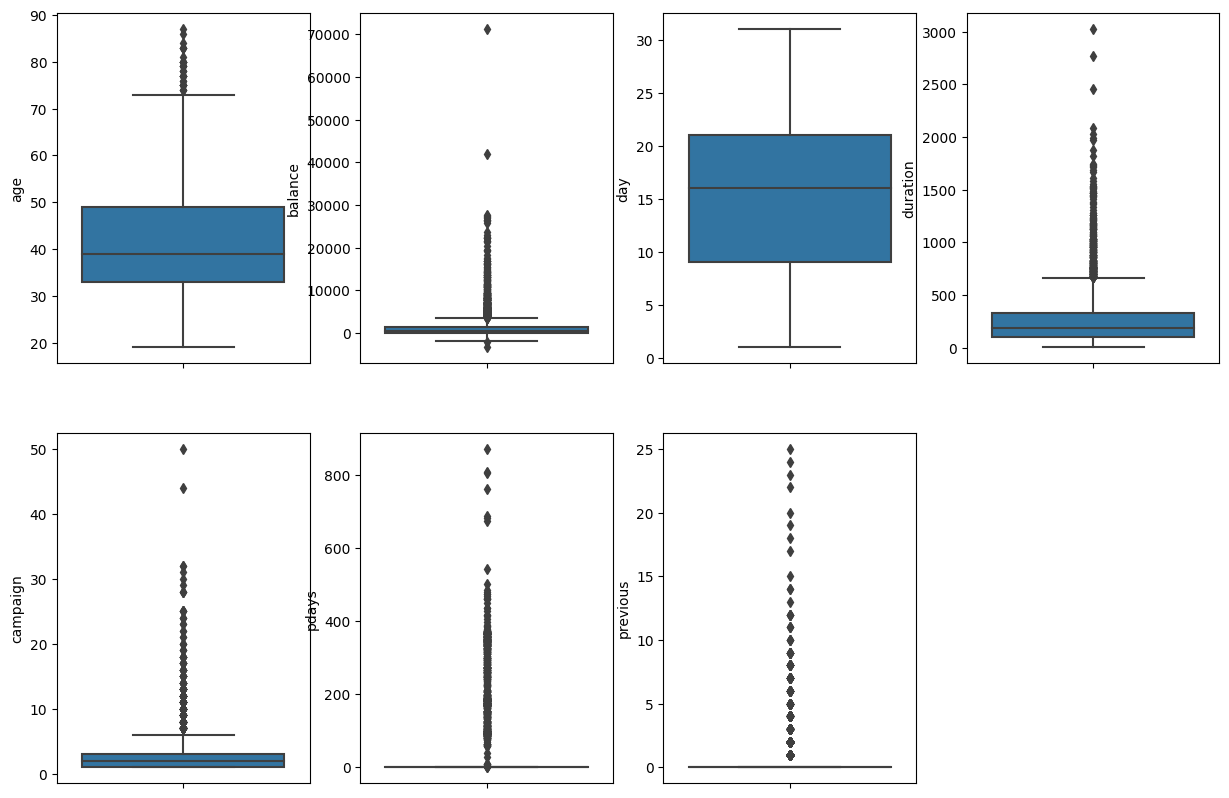

In [209]:
# creating boxplots for all the continuous columns of the dataframe
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data=bank)
plt.subplot(2,4,2)
sns.boxplot(y='balance',data=bank)
plt.subplot(2,4,3)
sns.boxplot(y='day',data=bank)
plt.subplot(2,4,4)
sns.boxplot(y='duration',data=bank)
plt.subplot(2,4,5)
sns.boxplot(y='campaign',data=bank)
plt.subplot(2,4,6)
sns.boxplot(y='pdays',data=bank)
plt.subplot(2,4,7)
sns.boxplot(y='previous',data=bank)

##### There are lot of outliers present in the dataframe but we can't drop them because of the very large quantity and are important for model making
---

<Axes: >

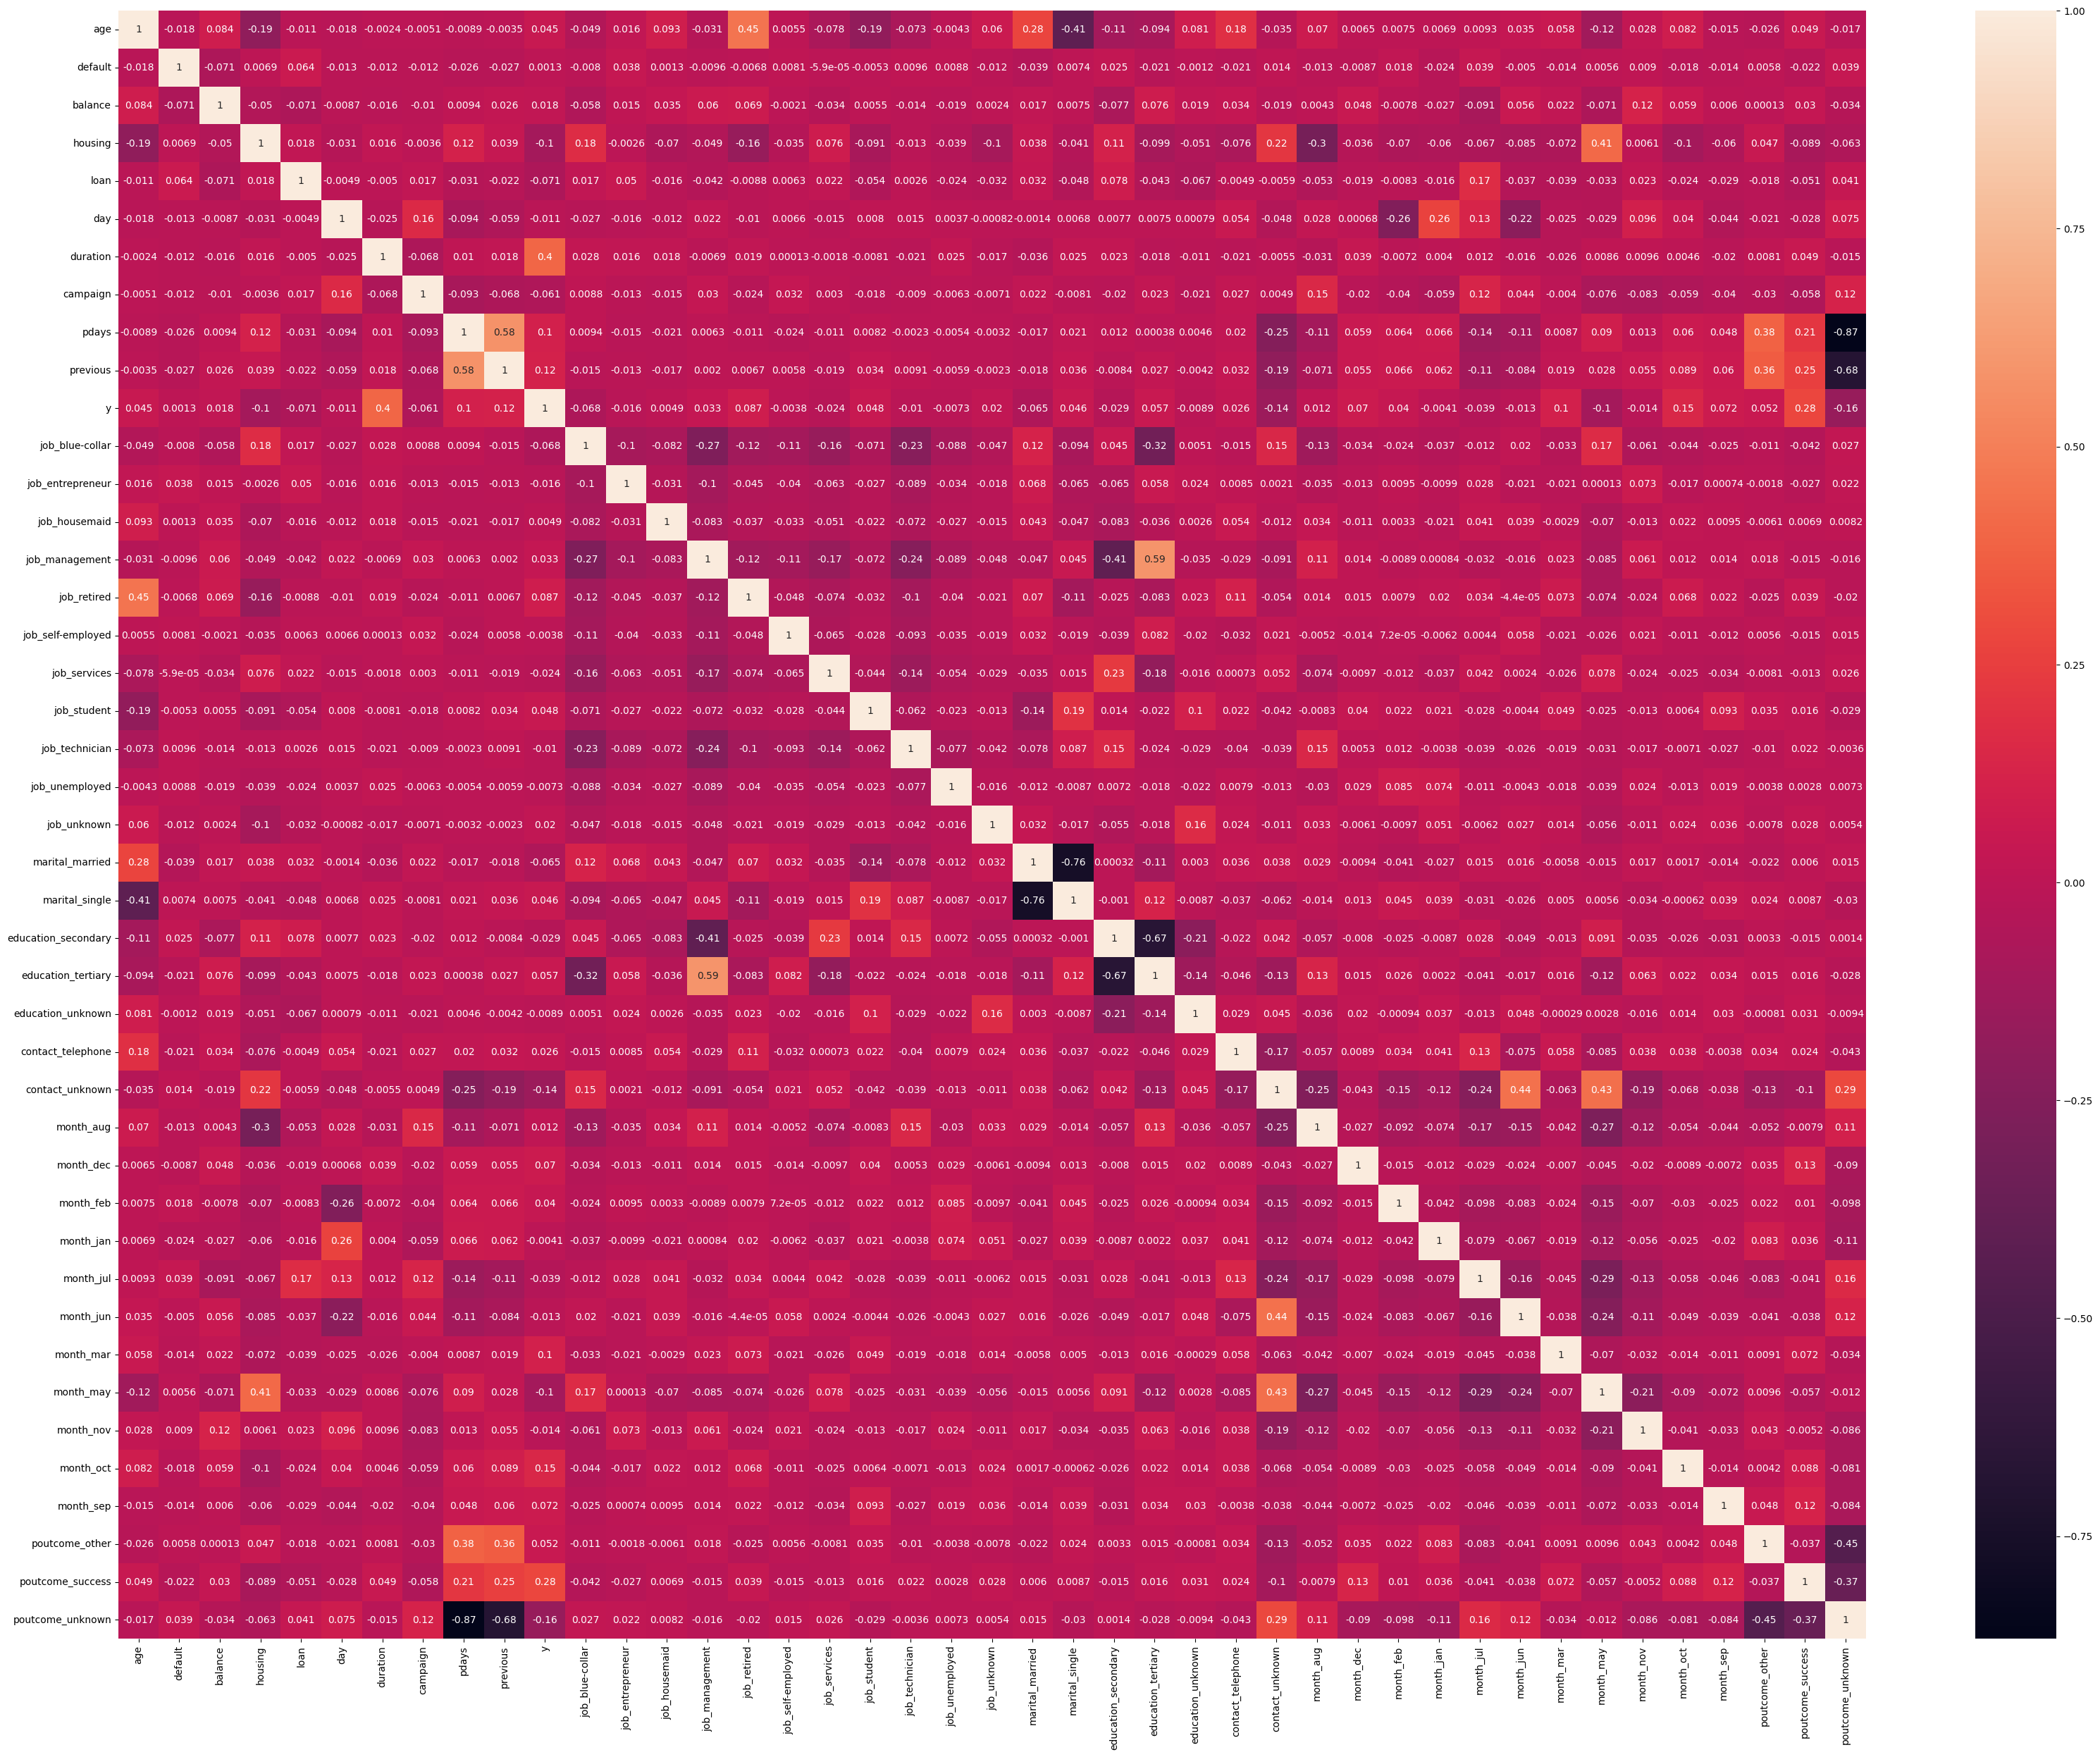

In [210]:
# Making a heatmap to find correlation
plt.figure(figsize=(40,30))
sns.heatmap(bank.corr(),annot=True)

##### We are not gonna drop any column because none of the column is very highly correlated with the target column
---

In [211]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,33,0,4789,1,1,11,220,1,339,4,0,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,35,0,1350,1,0,16,185,1,330,1,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,30,0,1476,1,1,3,199,4,-1,0,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4,59,0,0,1,0,5,226,1,-1,0,0,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [212]:
# subscription rate
round((sum(bank['y'])/len(bank.index))*100,2)

11.52

##### This shows that approximately 12% people are subscribed to the bank term deposit

---
##### Splitting the target variable and the predictor features in two different dataframes from Train Test Split 

In [213]:
print(bank.columns)


Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')


In [214]:
# X will have all the features except the target variable 'y'
X = bank.drop(columns=['y'])

# Y will have the target variable 'y'
Y = bank['y']


In [215]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,33,0,4789,1,1,11,220,1,339,4,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,35,0,1350,1,0,16,185,1,330,1,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,30,0,1476,1,1,3,199,4,-1,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
4,59,0,0,1,0,5,226,1,-1,0,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [216]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

---
## Step 3: Train Test Split

In [217]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

##### Splitting the data in train and test dataframe in the ratio of 7:3


---
## Step 4: Feature Scaling

In [218]:
scaler = StandardScaler()

x_train[['age','balance','day','duration','campaign','pdays','previous']] = scaler.fit_transform(x_train[['age','balance','day','duration','campaign','pdays','previous']])

In [219]:
x_train.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
2085,-0.781696,0,-0.490292,1,0,1.447256,-0.427557,0.045752,-0.402013,-0.318746,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
1239,-1.259091,0,0.905722,1,1,-1.323076,-0.225129,-0.258364,-0.402013,-0.318746,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
130,-0.017865,0,-0.410863,1,0,0.242764,-0.292605,0.045752,-0.402013,-0.318746,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2345,-1.450049,0,-0.299337,1,1,1.688155,-0.221381,0.653984,2.002237,1.486467,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1296,1.605278,0,-0.464680,0,0,0.001865,1.570479,-0.562480,-0.402013,-0.318746,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True


---
## Step 5: Model Building

##### Buiding first logistic regression model 

In [220]:
# Standardizing the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [221]:
# Building the logistic regression model
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)



LogisticRegression()

In [222]:
# Making predictions
y_train_pred = logreg.predict(x_train_scaled)
y_test_pred = logreg.predict(x_test_scaled)


In [223]:
# Model accuracy
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')


Train Accuracy: 0.9007585335018964
Test Accuracy: 0.13411938098747236


# Step 6  Feature Selection using RFE:

In [224]:
# Feature selection using RFE
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(x_train_scaled, y_train)

In [225]:
# Selected features
selected_features = X.columns[rfe.support_]
print(f'Selected Features: {selected_features}')

Selected Features: Index(['housing', 'loan', 'duration', 'campaign', 'job_blue-collar',
       'job_entrepreneur', 'job_retired', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'contact_unknown', 'month_aug', 'month_jan',
       'month_jul', 'month_may', 'month_nov', 'poutcome_success'],
      dtype='object')


# Step 7: Checking VIFs for the selected features

In [226]:
# Calculating VIFs for the selected features
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

In [227]:
# Selecting only the chosen features
X_selected = x_train_scaled[:, rfe.support_]
vif = calculate_vif(pd.DataFrame(X_selected, columns=selected_features))
print(vif)

               Features       VIF
0               housing  1.342061
1                  loan  1.052961
2              duration  1.018778
3              campaign  1.073896
4       job_blue-collar  1.400387
5      job_entrepreneur  1.053234
6           job_retired  1.126626
7        job_technician  1.165536
8        job_unemployed  1.043915
9       marital_married  2.392101
10       marital_single  2.422106
11  education_secondary  2.091827
12   education_tertiary  2.365892
13      contact_unknown  1.472866
14            month_aug  1.543703
15            month_jan  1.117615
16            month_jul  1.535608
17            month_may  1.703429
18            month_nov  1.297918
19     poutcome_success  1.042725


# Step 8: Metrics beyond accuracy

In [228]:
# Precision, Recall, F1-Score, and Confusion Matrix
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1_score = metrics.f1_score(y_test, y_test_pred)
confusion = metrics.confusion_matrix(y_test, y_test_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')
print(f'Confusion Matrix:\n{confusion}')


Precision: 0.10782080485952923
Recall: 1.0
F1 Score: 0.19465387251542152
Confusion Matrix:
[[  40 1175]
 [   0  142]]


# Step 9: Plotting the ROC Curve

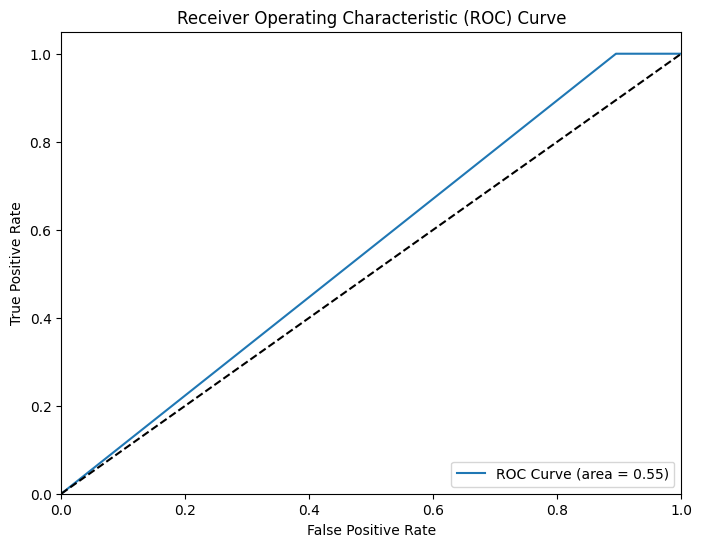

In [229]:
# Plotting the ROC Curve
y_test_pred_proba = logreg.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Step 10: Finding the Optimal Cutoff Point

In [230]:
# Finding the optimal cutoff point
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold}')


Optimal Threshold: 1.0


# Step 11: Precision and Recall with Optimal Threshold

In [231]:
# Making predictions using the optimal threshold
y_test_pred_optimal = (y_test_pred_proba >= optimal_threshold).astype(int)

# Precision, Recall, F1-Score with optimal threshold
precision_optimal = precision_score(y_test, y_test_pred_optimal)
recall_optimal = recall_score(y_test, y_test_pred_optimal)
f1_score_optimal = metrics.f1_score(y_test, y_test_pred_optimal)

print(f'Precision (Optimal Threshold): {precision_optimal}')
print(f'Recall (Optimal Threshold): {recall_optimal}')
print(f'F1 Score (Optimal Threshold): {f1_score_optimal}')


Precision (Optimal Threshold): 0.11554109031733116
Recall (Optimal Threshold): 1.0
F1 Score (Optimal Threshold): 0.20714806710430345


# Step 12: Making Predictions on Test Data

In [232]:
# Making predictions on test data using the optimal threshold
y_test_pred_final = (y_test_pred_proba >= optimal_threshold).astype(int)

# Final metrics
final_precision = precision_score(y_test, y_test_pred_final)
final_recall = recall_score(y_test, y_test_pred_final)
final_f1_score = metrics.f1_score(y_test, y_test_pred_final)
final_confusion = metrics.confusion_matrix(y_test, y_test_pred_final)

print(f'Final Precision: {final_precision}')
print(f'Final Recall: {final_recall}')
print(f'Final F1 Score: {final_f1_score}')
print(f'Final Confusion Matrix:\n{final_confusion}')


Final Precision: 0.11554109031733116
Final Recall: 1.0
Final F1 Score: 0.20714806710430345
Final Confusion Matrix:
[[ 128 1087]
 [   0  142]]


#  recommended improvements step by step:

**Step 1: Addressing Data Imbalance using SMOTE**
* SMOTE (Synthetic Minority Over-sampling Technique) will help create synthetic samples for the  minority class.


In [233]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print(f'Original class distribution: {Counter(y_train)}')
print(f'Class distribution after SMOTE: {Counter(y_train_smote)}')


Original class distribution: Counter({0: 2785, 1: 379})
Class distribution after SMOTE: Counter({0: 2785, 1: 2785})


**Step 2:  Feature Scaling:**

In [234]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smote)
x_test_scaled = scaler.transform(x_test)


**3. Train Logistic Regression with Best Parameters:**

In [235]:
best_logreg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=42)
best_logreg.fit(x_train_scaled, y_train_smote)


LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')

**4. Evaluate Model Performance:**

In [236]:
# Training data evaluation
y_train_pred = best_logreg.predict(x_train_scaled)
train_accuracy = best_logreg.score(x_train_scaled, y_train_smote)
train_precision = precision_score(y_train_smote, y_train_pred)
train_recall = recall_score(y_train_smote, y_train_pred)
train_f1 = metrics.f1_score(y_train_smote, y_train_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Training Precision: {train_precision}')
print(f'Training Recall: {train_recall}')
print(f'Training F1 Score: {train_f1}')

Training Accuracy: 0.8768402154398564
Training Precision: 0.8845731037009894
Training Recall: 0.866786355475763
Training F1 Score: 0.8755894087776568


In [237]:
# Test data evaluation
y_test_pred = best_logreg.predict(x_test_scaled)
test_accuracy = best_logreg.score(x_test_scaled, y_test)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = metrics.f1_score(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')

Test Accuracy: 0.2697126013264554
Test Precision: 0.11722272317403065
Test Recall: 0.9154929577464789
Test F1 Score: 0.20783373301358912


**5. Plot the ROC Curve and Determine Optimal Threshold:**

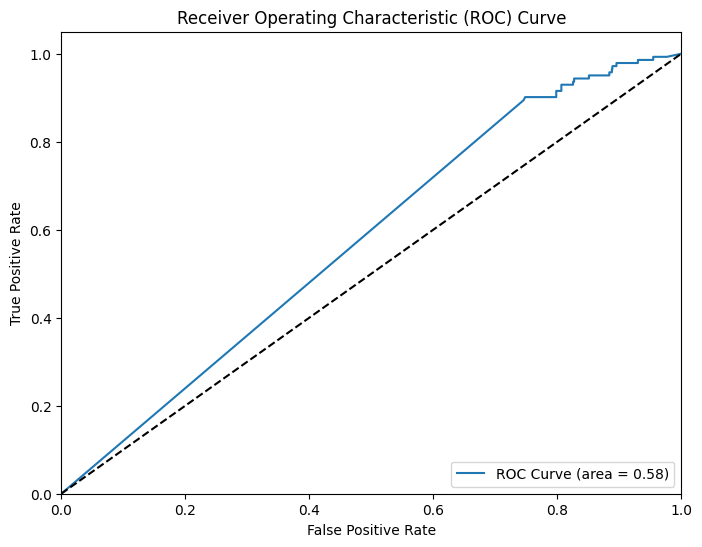

In [238]:
# Predict probabilities
y_test_pred_proba = best_logreg.predict_proba(x_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [239]:
# Finding the optimal cutoff point
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold}')


Optimal Threshold: 0.9999999999999996


In [240]:
# Predictions using the optimal threshold
y_test_pred_optimal = (y_test_pred_proba >= optimal_threshold).astype(int)

# Evaluate performance with optimal threshold
precision_optimal = precision_score(y_test, y_test_pred_optimal)
recall_optimal = recall_score(y_test, y_test_pred_optimal)
f1_score_optimal = metrics.f1_score(y_test, y_test_pred_optimal)

print(f'Precision (Optimal Threshold): {precision_optimal}')
print(f'Recall (Optimal Threshold): {recall_optimal}')
print(f'F1 Score (Optimal Threshold): {f1_score_optimal}')

Precision (Optimal Threshold): 0.12343297974927676
Recall (Optimal Threshold): 0.9014084507042254
F1 Score (Optimal Threshold): 0.21713316369804922


In [241]:
# Final predictions on test data
final_precision = precision_score(y_test, y_test_pred_optimal)
final_recall = recall_score(y_test, y_test_pred_optimal)
final_f1_score = metrics.f1_score(y_test, y_test_pred_optimal)
final_confusion = metrics.confusion_matrix(y_test, y_test_pred_optimal)

print(f'Final Precision: {final_precision}')
print(f'Final Recall: {final_recall}')
print(f'Final F1 Score: {final_f1_score}')
print(f'Final Confusion Matrix:\n{final_confusion}')

Final Precision: 0.12343297974927676
Final Recall: 0.9014084507042254
Final F1 Score: 0.21713316369804922
Final Confusion Matrix:
[[306 909]
 [ 14 128]]
